## os module

### 디렉토리 생성

In [2]:
import os
os.mkdir("log")

In [3]:
try:
    os.mkdir("log")
except:
    print("Already created")

Already created


### 파일 or 디렉토리 존재 확인

In [6]:
# 파일 or 폴더가 이미 존재하는지 확인
os.path.exists("log")

True

In [9]:
# 폴더말고 파일이 존재하는지 확인
os.path.isfile("file.ipynb")

True

## shutil module - 파일 복사

In [11]:
import shutil

source= "README.md"
# os.path.join쓰는 이유: 파일 경로를 합칠 때 seperator가 OS마다 다르다. 
# 윈도우:₩₩, Mac, Linux:/, 등등
dest = os.path.join("log","test.txt")
dest

'log/test.txt'

In [12]:
## shutil - 파일 복사
shutil.copy(source,dest)

'log/test.txt'

In [13]:
!ls log

test.txt


## pathlib - path를 객체로 다룸

In [16]:
import pathlib

In [17]:
cwd = pathlib.Path.cwd()
cwd

PosixPath('/Users/cwj/ToyProject/00_data_analysis/boostcourse/AI_Basic')

In [20]:
# Path가 객체기 때문에 parent, parent의 parent 이런식으로 편하게 접근 가능
print(cwd.parent)
print(cwd.parent.parent)

/Users/cwj/ToyProject/00_data_analysis/boostcourse
/Users/cwj/ToyProject/00_data_analysis


In [23]:
# 모든 부모 경로도 가능
list(cwd.parents)

[PosixPath('/Users/cwj/ToyProject/00_data_analysis/boostcourse'),
 PosixPath('/Users/cwj/ToyProject/00_data_analysis'),
 PosixPath('/Users/cwj/ToyProject'),
 PosixPath('/Users/cwj'),
 PosixPath('/Users'),
 PosixPath('/')]

## Pickle
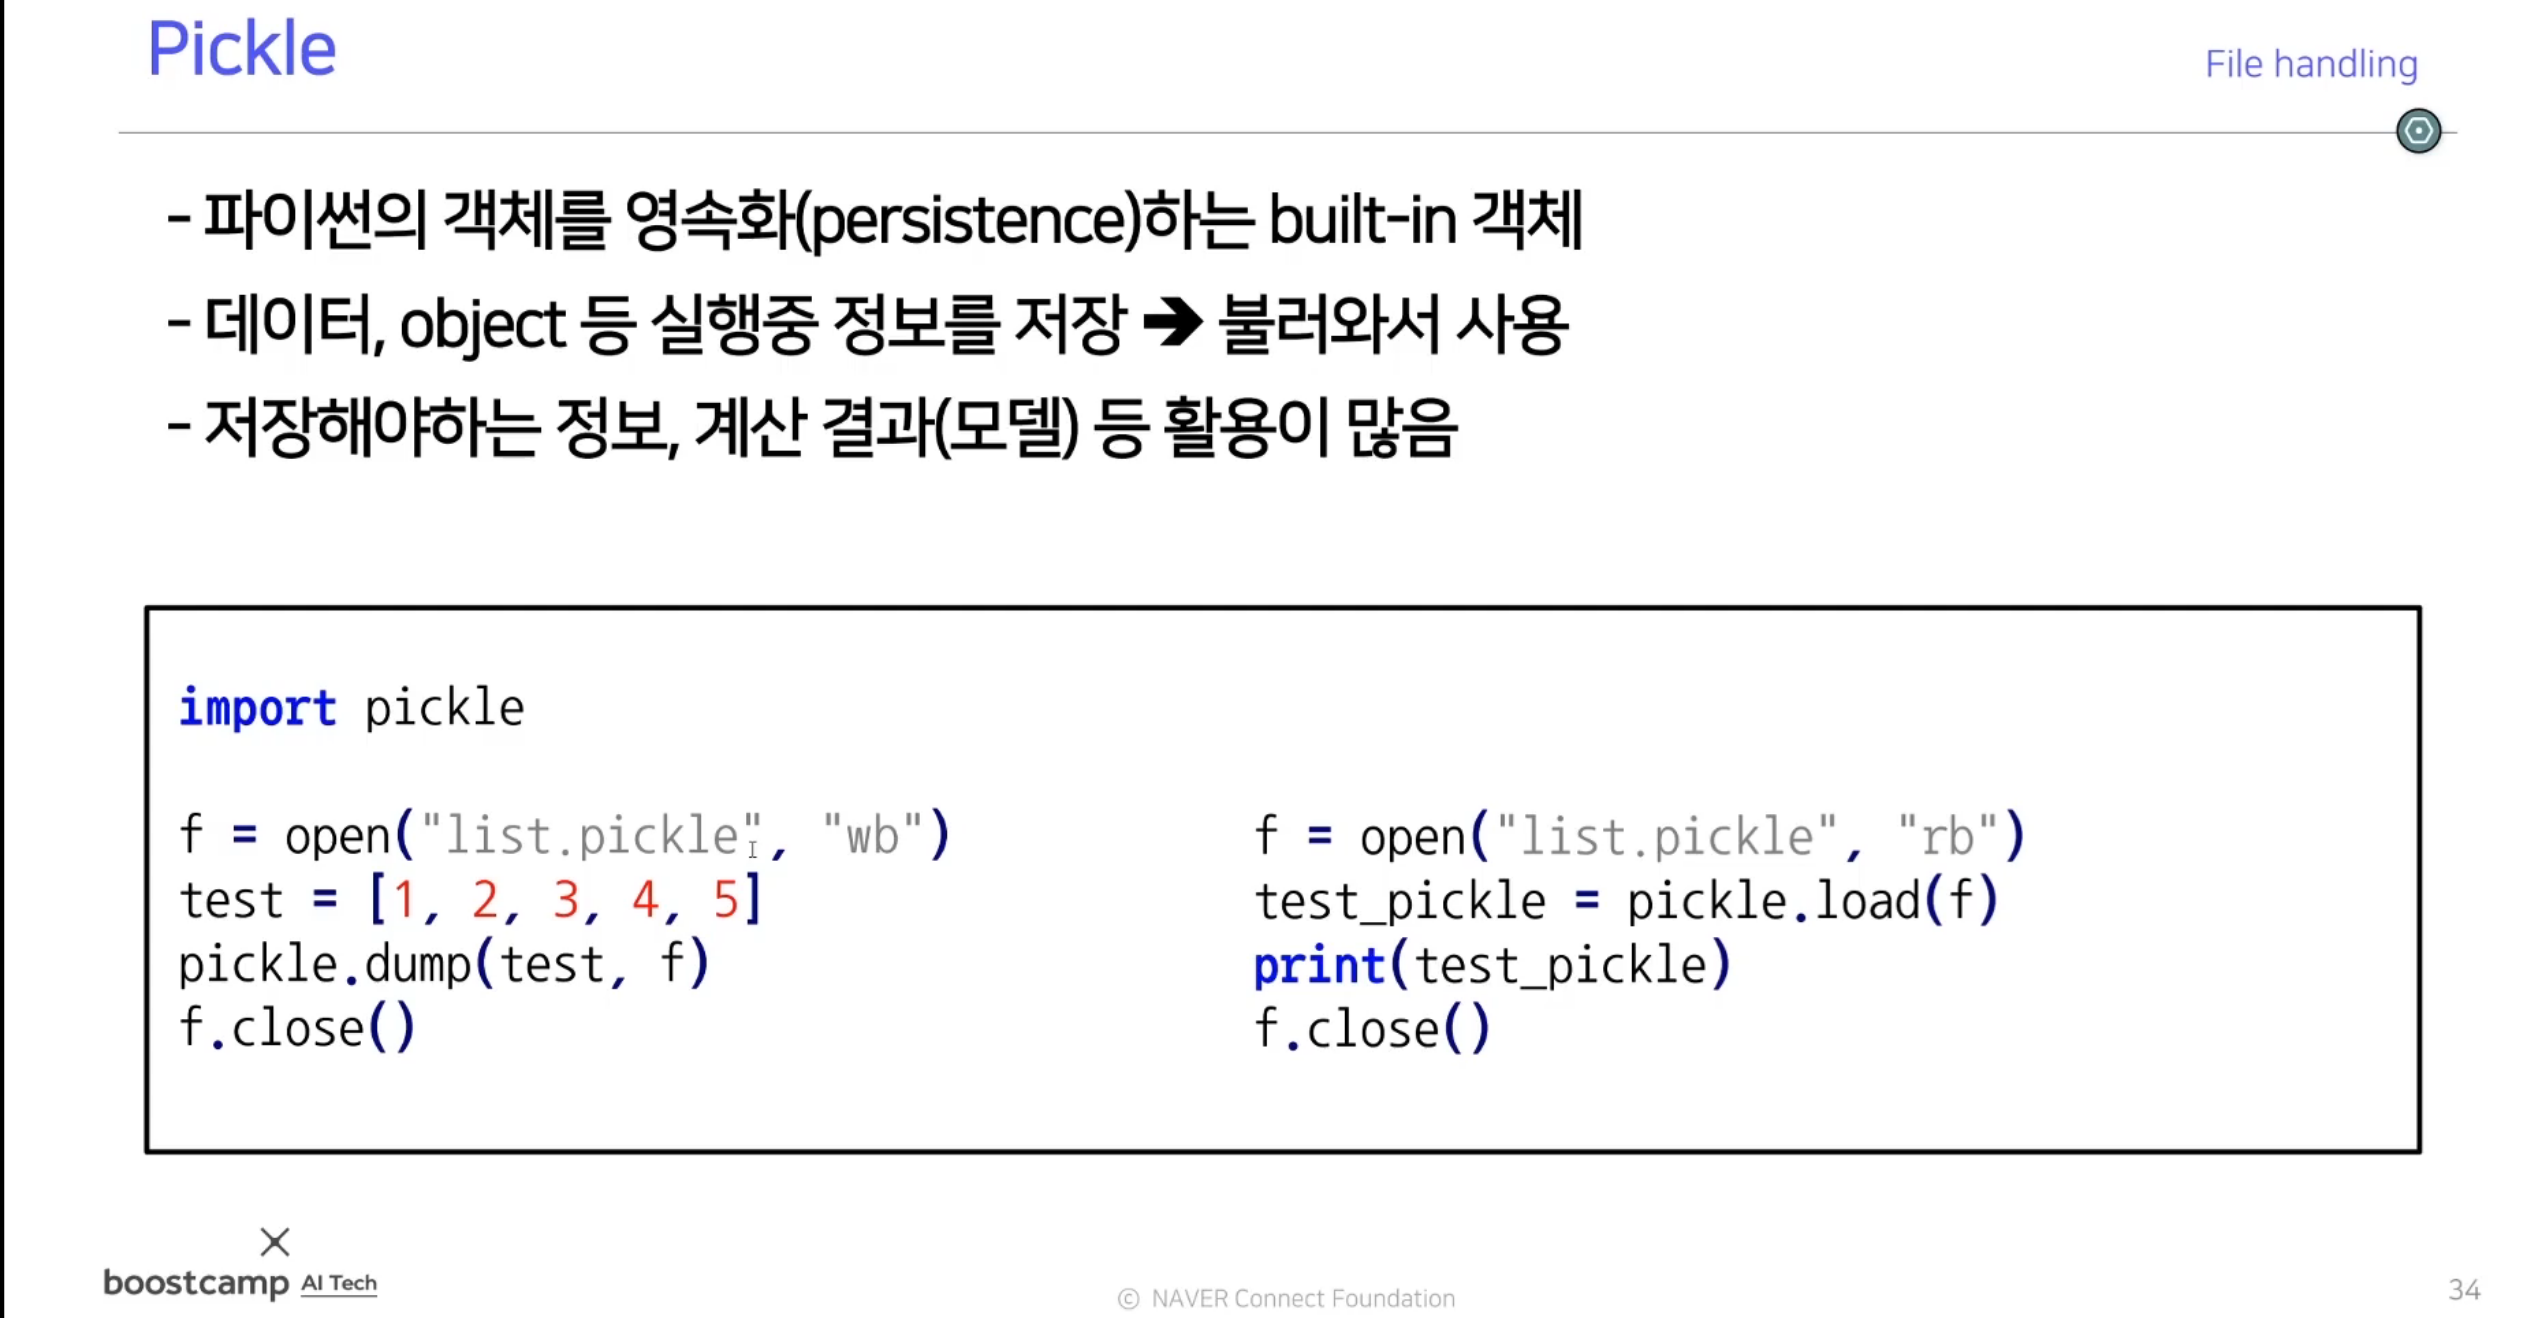

### list 다루기

In [1]:
import pickle

li=[0,1,2,3,4,5]
## pickle은 python에 특화된 binary 파일이다.
with open("list.pickle","wb") as f:
    pickle.dump(li, f) # 위에서 생성한 리스트를 list.pickle로 저장    

with open("list.pickle","rb") as fi:
    test = pickle.load(fi) # list.pickle 읽어서 출력 -> list 잘 불러와졌다.

In [90]:
# pickle로 불러온 test의 type과 값 출력
print(type(test))
print(test)

<class 'list'>
[0, 1, 2, 3, 4, 5]


### 데이터프레임 다루기

In [7]:
import pandas as pd
df = pd.DataFrame({'A':[0,1],'B':[2,3]})
df

,A,B
0,0,2
1,1,3


In [10]:
## pickle은 python에 특화된 binary 파일이다.
with open("df.pickle","wb") as f:
    pickle.dump(df, f) # 위에서 생성한 데이터 프레임을 df.pickle로 저장    

with open("df.pickle","rb") as fi:
    test = pickle.load(fi) # df.pickle 읽기
# 출력해보면 pandas의 데이터프레임이 그대로 잘 출력됨.
print(type(test))
test

<class 'pandas.core.frame.DataFrame'>


,A,B
0,0,2
1,1,3


### 함수 다루기

In [14]:
import numpy as np
print(np.array)

<built-in function array>


In [15]:
with open("array.pickle","wb") as f:
    pickle.dump(np.array, f)
with open("array.pickle","rb") as fi:
    arr = pickle.load(fi)

k = arr(list(range(10)))
print(type(k))
print(k)

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]


### 클래스 다루기

In [16]:
# 클래스 내부에 multiplier 값을 저장
# 이후에 multiply 메소드에 들어오는 값을 multiplier와 곱해서 반환
class Multiply(object):
    def __init__(self, multiplier):
        self.multiplier = multiplier
        
    def multiply(self, num):
        return num * self.multiplier

mply = Multiply(3) # multiplier를 3으로 지정
mply.multiply(3) # multiplier * 3 반환 => 9

9

In [96]:
with open("mply_object.pickle","wb") as f:
    pickle.dump(mply, f)

with open("mply_object.pickle","rb") as fi:
    mply_pickle = pickle.load(fi)    

print(type(mply_pickle))
mply_pickle.multiply(10)

<class '__main__.Multiply'>


30